## PART 1
 * Importing libraries and loading dataset
 * Examining the dataset to understand its organization 
 * Checking for missing data and duplicates
 * Fixing any incosistency in the dataset

 <font size="5">Importing libraries</font>

In [126]:
#import necessary modules
import shapely
import warnings
from shapely.errors import ShapelyDeprecationWarning
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from shapely.geometry import Point
import geopandas as gpd

%matplotlib inline

<font size="5">Loading dataset</font>
> The data set is provided as a csv file __[in the repo](https://github.com/Aanuoluwa101/Data-Science/Brazilian_fire_EDA)__

In [127]:
#load dataset
data = pd.read_csv('Brazilian-fire-dataset.csv')

<font size="5">Examining the data</font>

In [128]:
data.head()

,Year,State,Month,Number of Fires,Date Reported
0,1998,Acre,January,0.0,1/01/1998
1,1999,Acre,January,0.0,1/01/1999
2,2000,Acre,January,0.0,1/01/2000
3,2001,Acre,January,0.0,1/01/2001
4,2002,Acre,January,0.0,1/01/2002


In [129]:
data.tail()

,Year,State,Month,Number of Fires,Date Reported
6449,2012,Tocantins,December,128.0,1/01/2012
6450,2013,Tocantins,December,85.0,1/01/2013
6451,2014,Tocantins,December,223.0,1/01/2014
6452,2015,Tocantins,December,373.0,1/01/2015
6453,2016,Tocantins,December,119.0,1/01/2016


In [130]:
data.Year.unique()

array([1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008,
       2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017], dtype=int64)

In [131]:
data.State.unique()

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso', 'Mato Grosso do Sul', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de January',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'Santa Catarina', 'São Paulo', 'Sergipe', 'Tocantins'],
      dtype=object)

In [132]:
data.Month.unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [133]:
data

,Year,State,Month,Number of Fires,Date Reported
0,1998,Acre,January,0.0,1/01/1998
1,1999,Acre,January,0.0,1/01/1999
2,2000,Acre,January,0.0,1/01/2000
3,2001,Acre,January,0.0,1/01/2001
4,2002,Acre,January,0.0,1/01/2002
...,...,...,...,...,...
6449,2012,Tocantins,December,128.0,1/01/2012
6450,2013,Tocantins,December,85.0,1/01/2013
6451,2014,Tocantins,December,223.0,1/01/2014
6452,2015,Tocantins,December,373.0,1/01/2015


* The dataset is organized such that the Number of fires is recorded for each month from 1998 to 2017, and this is done for each state. For example, fires in Acre occuring in January from 1998 to 2017, then fires in Acre occuring in Feburary from 1998 to 2017 etc.



<font size="5">Checking for missing data,duplicates and the consistency of the data</font>

In [134]:
#checking for duplicates

sum(data.duplicated())

1

In [135]:
data[data.duplicated()]

,Year,State,Month,Number of Fires,Date Reported
259,2017,Alagoas,January,38.0,1/01/2017


In [136]:
data.iloc[258:260,:]

,Year,State,Month,Number of Fires,Date Reported
258,2017,Alagoas,January,38.0,1/01/2017
259,2017,Alagoas,January,38.0,1/01/2017


In [137]:
#remove the duplicates making sure to keep the first entry

data = data.drop_duplicates(keep = "first")

In [138]:
sum(data.duplicated())

0

In [139]:
#Checking for missing data
data.isna().any()

#no missing data

Year               False
State              False
Month              False
Number of Fires    False
Date Reported      False
dtype: bool

In [140]:
print("Number of states: ", len(data.State.unique()))
print("Number of years: ", len(data.Year.unique()))
print("Number of months: ", len(data.Month.unique()))


Number of states:  27
Number of years:  20
Number of months:  12


In [141]:
print("Expected number of data points: ", 27 * 20 * 12)
print("Number of data points: ", len(data))

Expected number of data points:  6480
Number of data points:  6453


* We have less data points than we expected, given the structure of the dataset. <br> 

Let us find out why this is so

In [142]:
#grouping the Number of fires by year
year_grouped = data['Number of Fires'].groupby(data['Year'])  

In [143]:
#making a dictionary from the grouped data. Format(key:value) Year : Number of fires recorded
year_fire = {}
for year, fires in year_grouped:
    year_fire[year] = fires

year_fire

{1998: 0       0.000
 20      0.000
 40      0.000
 60      0.000
 80      0.000
         ...  
 6355    3.747
 6375    5.149
 6395    1.738
 6415    1.000
 6435    9.000
 Name: Number of Fires, Length: 324, dtype: float64,
 1999: 1        0.000
 21       0.000
 41       0.000
 61       0.000
 81       0.000
          ...  
 6356     1.284
 6376     3.415
 6396     1.378
 6416    29.000
 6436    16.000
 Name: Number of Fires, Length: 324, dtype: float64,
 2000: 2        0.000
 22       0.000
 42      11.000
 62       1.000
 82       1.000
          ...  
 6357     1.949
 6377     2.552
 6397     1.053
 6417    96.000
 6437    20.000
 Name: Number of Fires, Length: 324, dtype: float64,
 2001: 3         0.000
 23        0.000
 43        0.000
 63        0.000
 83        0.000
          ...   
 6358      2.242
 6378      4.839
 6398    684.000
 6418    100.000
 6438     21.000
 Name: Number of Fires, Length: 324, dtype: float64,
 2002: 4         0.000
 24        1.000
 44        0.000
 64

* All the years have 324 data points each, except 2017 with 298 data points. <br>

Let us probe further into the 2017 data.

In [144]:
#Extracting 2017 data
data_17 = data[data['Year'] == 2017]  
data_17 = data_17['Month'].groupby(data_17['State'])

In [145]:
states_2017 = {}
for state, month in data_17:
    states_2017[state] = month

states_2017

{'Acre': 19       January
 39      February
 59         March
 79         April
 99           May
 119         June
 139         July
 159       August
 179    September
 199      October
 219     November
 Name: Month, dtype: object,
 'Alagoas': 258      January
 279     February
 299        March
 319        April
 339          May
 359         June
 379         July
 399       August
 419    September
 439      October
 459     November
 Name: Month, dtype: object,
 'Amapá': 498      January
 518     February
 538        March
 558        April
 578          May
 598         June
 618         July
 638       August
 658    September
 678      October
 698     November
 Name: Month, dtype: object,
 'Amazonas': 737      January
 757     February
 777        March
 797        April
 817          May
 837         June
 857         July
 877       August
 897    September
 917      October
 937     November
 Name: Month, dtype: object,
 'Bahia': 976       January
 996      February
 1016

In [146]:
states_17_dict = {state: len(states_2017[state]) for state in states_2017.keys()}
pd.Series(states_17_dict)

Acre                   11
Alagoas                11
Amapá                  11
Amazonas               11
Bahia                  11
Ceará                  11
Distrito Federal       11
Espírito Santo         11
Goiás                  11
Maranhão               11
Mato Grosso            11
Mato Grosso do Sul     11
Minas Gerais           11
Paraná                 11
Paraíba                11
Pará                   11
Pernambuco             11
Piauí                  11
Rio Grande do Norte    11
Rio Grande do Sul      11
Rio de January         11
Rondônia               11
Roraima                11
Santa Catarina         11
Sergipe                11
São Paulo              11
Tocantins              11
dtype: int64

* In 2017, all the states lacked data for December. <br>

We could exclude all Decembers or 2017 from the analysis, but we'll go for the former as we would still like to examine the trends in December. <br>

In [147]:
data = data[data.Year != 2017] 

In [148]:
len(data) == 19 * 27 * 12   #using 19 years

True

## PART 2 : Plotting and visualization
* Bar plots
* cluster maps
* choropleth maps




<font size="5">Barplots</font>

In [149]:
#grouping Number of fires by year
year_grouped = data['Number of Fires'].groupby(data['Year'])  

#converting the year_grouped grouby object into a series by aggregation
year_grouped = year_grouped.sum()

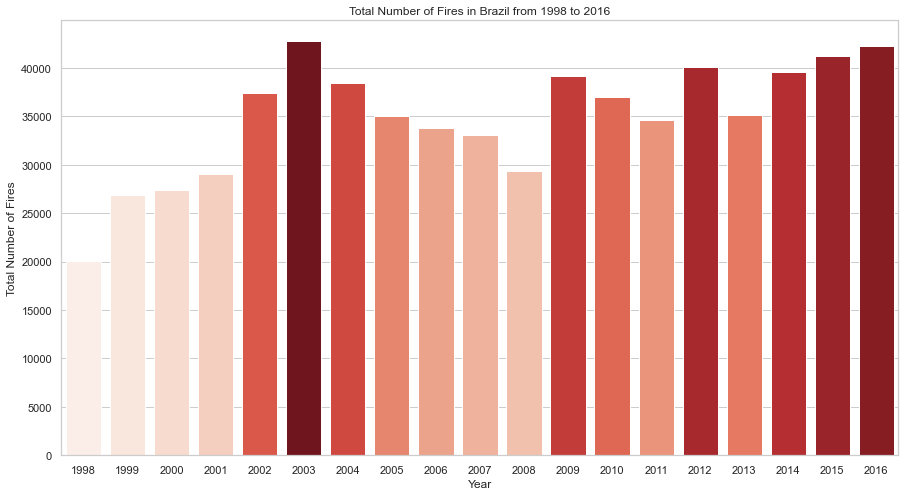

In [150]:
#Barplot showing the total number fires from 1998 to 2016
fig, ax = plt.subplots(figsize = (15, 8))

sns.set(style = 'whitegrid', color_codes = True)
palette = sns.color_palette("Reds_r", len(year_grouped))
rank = year_grouped.argsort().argsort()
sns.barplot(x = year_grouped.index, y = year_grouped.values, palette = np.array(palette[::-1])[rank])
ax.set(ylabel = "Total Number of Fires")
plt.title("Total Number of Fires in Brazil from 1998 to 2016")
plt.show()

* The number of fires generally increased over the years. There have been more fires in recent years. This is probably due to climate change and other detrimental effects of increased human activities in the natural environment.

* There was also an oddly large number fires from 2002 to 2004, especially in 2003. This can be further investigated. 

The trend can be better seen in the line plot below

<AxesSubplot:xlabel='Year', ylabel='Number of Fires'>

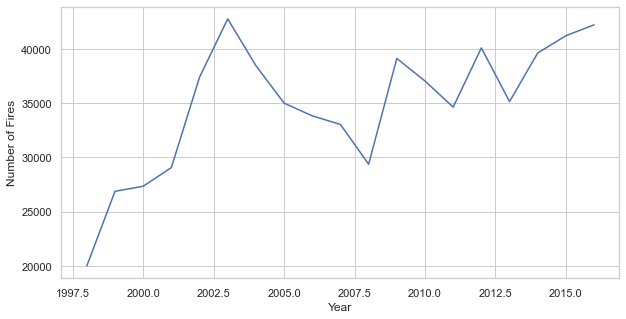

In [151]:
fig, ax = plt.subplots(figsize = (10, 5))

sns.lineplot(x = year_grouped.index, y = year_grouped)

In [152]:
month_grouped = data['Number of Fires'].groupby(data['Month'])

month_grouped = month_grouped.sum().reindex(['January', 'February', 'March', 'April', 
                                             'May', 'June', 'July', 'August', 'September',
                                              'October', 'November', 'December'])

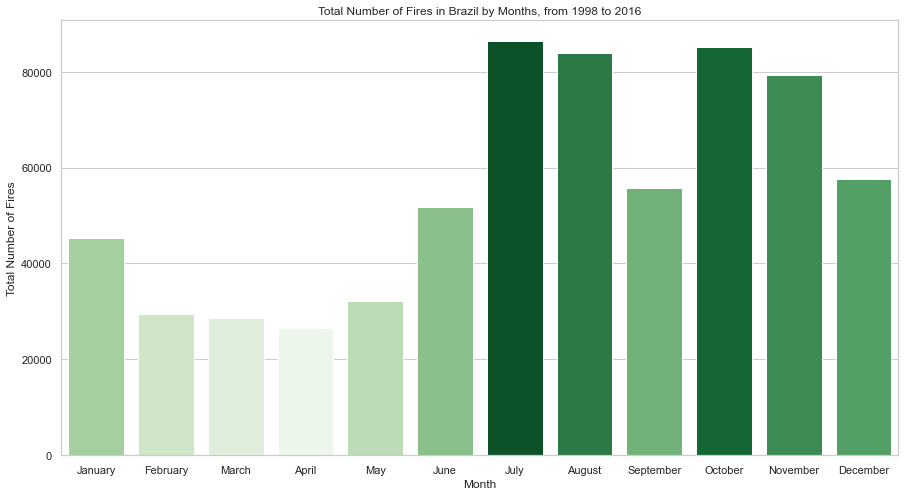

In [153]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.set(style = 'whitegrid', color_codes = True)
palette = sns.color_palette("Greens_r", len(month_grouped))
rank = month_grouped.argsort().argsort()
sns.barplot(x = month_grouped.index, y = month_grouped, palette = np.array(palette[::-1])[rank])
ax.set(ylabel = "Total Number of Fires")
plt.title("Total Number of Fires in Brazil by Months, from 1998 to 2016")
plt.show()

* Fires are on the high side in the second half of the year. This is most likely because these months fall in the dry season.

In [154]:
state_grouped = data['Number of Fires'].groupby(data.State)
state_grouped = pd.Series(state_grouped.sum()).sort_values()

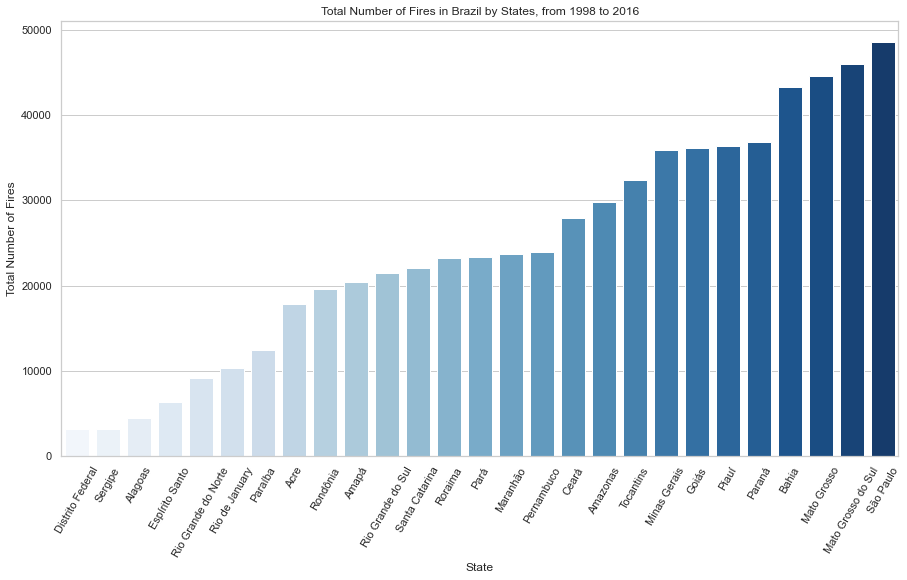

In [155]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.set(style = 'whitegrid', color_codes = True)
palette = sns.color_palette("Blues_r", len(state_grouped))
rank = state_grouped.argsort().argsort()
sns.barplot(x = state_grouped.index, y = state_grouped, palette = np.array(palette[::-1])[rank])
ax.set(ylabel = "Total Number of Fires")
plt.xticks(rotation = 60)
plt.title("Total Number of Fires in Brazil by States, from 1998 to 2016")
plt.show()

* Obviously we see that the number of fire occurrences varies accross the states. This is probably due to differences in weather condition across states and regions, and perhaps differences in the level of human impact on the environment
* Also, there seems to several groups of states having similar number of fires. We would later see this better when we cluster.


<font size="5">Cluster map</font>

In [156]:
#creating a dataframe of the total number of fires across months and states
state_month = data['Number of Fires'].groupby([data['Month'], data['State']]).sum()
state_month = state_month.unstack().reindex(month_grouped.index)
state_month.head()

State,Acre,Alagoas,Amapá,Amazonas,Bahia,Ceará,Distrito Federal,Espírito Santo,Goiás,Maranhão,...,Piauí,Rio Grande do Norte,Rio Grande do Sul,Rio de January,Rondônia,Roraima,Santa Catarina,Sergipe,São Paulo,Tocantins
Month,,,,,,,,,,,,,,,,,,,,,
January,40.0,857.0,277.0,1466.0,3658.0,3029.0,7.0,275.0,684.0,4366.0,...,1261.0,923.0,1246.0,207.0,431.0,3874.754,464.0,797.0,844.0,914.0
February,18.0,482.0,20.0,995.0,3185.0,393.0,13.0,319.0,1061.0,975.0,...,630.0,234.0,616.0,356.0,257.0,5289.000,302.0,532.0,1397.0,807.0
March,23.0,531.0,16.0,683.0,3240.0,178.0,6.0,291.0,806.0,593.0,...,531.0,104.0,960.0,200.0,216.0,4657.320,576.0,610.0,1404.0,814.0
April,40.0,238.0,10.0,172.0,2416.0,70.0,24.0,259.0,1129.0,894.0,...,546.0,82.0,950.0,185.0,185.0,2259.000,551.0,243.0,1908.0,1835.0
May,71.0,55.0,12.0,179.0,2523.0,161.0,90.0,169.0,2263.0,1805.0,...,1290.0,99.0,722.0,203.0,328.0,367.000,463.0,49.0,2881.0,5100.0


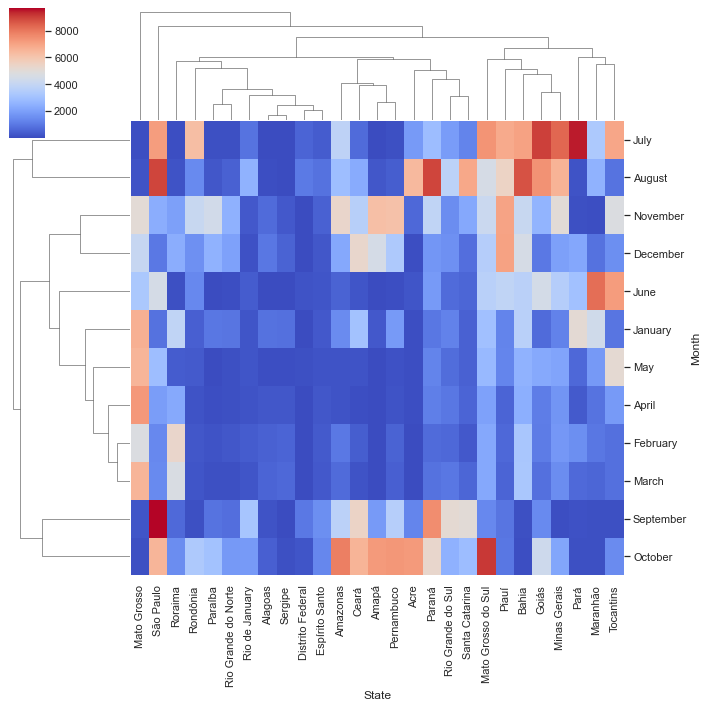

In [157]:
sns.clustermap(data = state_month, cmap = 'coolwarm')

* Roraima (3rd in the cluster) and the next 8 states after it generally have a relatively low number of fires throughout the year
* States with more fire occurrences have those in the second half of the year as earlier observed. Mato Grosso however tends to deviate from this trend; having more fire occurences early in the year.

<font size="5">Choropleth map</font>

The shapefiles used in drawing the chloropleth map can be found __[here on kaggle](https://www.kaggle.com/datasets/rodsaldanha/brazilianstatesshapefiles)__ <br>

**NOTE**: All other files associated with the .shp file should in thesame directory as the .shp file, prefarably thesame directory from which you are running the notebook. 

In [158]:
states_geo = gpd.read_file("BRA_adm1.shp")

In [159]:
states_geo.shape

(27, 13)

In [160]:
states_geo.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350..."
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ..."
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0..."
3,33,BRA,Brazil,4,Amazonas,BR.AM,0,None,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997..."
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708..."


 In order to add "Number of fires" to our geopandas dataframe, we will merge **states_geo** and **state_grouped**.
 Remember state_grouped is a series containing the total number of fires indexed by states <br>
 We will merge based on the **NAME_1** column in states_geo and the **index** of state_grouped

In [161]:
state_grouped.head()

State
Distrito Federal       3151.0
Sergipe                3162.0
Alagoas                4485.0
Espírito Santo         6312.0
Rio Grande do Norte    9127.0
Name: Number of Fires, dtype: float64

Before merging, let us make sure the names of the states in states_geo and state_grouped are exactly thesame, in order to avoid loss of data

In [162]:
set(states_geo.NAME_1) == set(state_grouped.index)

False

In [163]:
#Rio de Janeiro seems to be differently spelt in the two columns

set(states_geo.NAME_1) - set(state_grouped.index)

{'Rio de Janeiro'}

In [164]:
states_geo.NAME_1.values

array(['Acre', 'Alagoas', 'Amapá', 'Amazonas', 'Bahia', 'Ceará',
       'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
       'Mato Grosso do Sul', 'Mato Grosso', 'Minas Gerais', 'Pará',
       'Paraíba', 'Paraná', 'Pernambuco', 'Piauí', 'Rio de Janeiro',
       'Rio Grande do Norte', 'Rio Grande do Sul', 'Rondônia', 'Roraima',
       'São Paulo', 'Santa Catarina', 'Sergipe', 'Tocantins'],
      dtype=object)

In [165]:
state_grouped.index

Index(['Distrito Federal', 'Sergipe', 'Alagoas', 'Espírito Santo',
       'Rio Grande do Norte', 'Rio de January', 'Paraíba', 'Acre', 'Rondônia',
       'Amapá', 'Rio Grande do Sul', 'Santa Catarina', 'Roraima', 'Pará',
       'Maranhão', 'Pernambuco', 'Ceará', 'Amazonas', 'Tocantins',
       'Minas Gerais', 'Goiás', 'Piauí', 'Paraná', 'Bahia', 'Mato Grosso',
       'Mato Grosso do Sul', 'São Paulo'],
      dtype='object', name='State')

In [166]:
#Rio de Janeiro is spelt "Rio de January" in state_grouped

#make a dataframe from state_grouped and make its index a column of that df
state_grouped = state_grouped.to_frame().reset_index() 

#replace with the correct spelling
state_grouped["State"] = state_grouped["State"].replace("Rio de January", "Rio de Janeiro")

In [167]:
set(states_geo.NAME_1) == set(state_grouped.State)

True

In [168]:
#now we can merge

states_geo = pd.merge(states_geo, state_grouped, left_on = "NAME_1", right_on = "State")

In [169]:
states_geo.drop("State", axis = 1, inplace = True)

In [170]:
#Number of fires has been added to the geopandas dataframe

states_geo.columns

Index(['ID_0', 'ISO', 'NAME_0', 'ID_1', 'NAME_1', 'HASC_1', 'CCN_1', 'CCA_1',
       'TYPE_1', 'ENGTYPE_1', 'NL_NAME_1', 'VARNAME_1', 'geometry',
       'Number of Fires'],
      dtype='object')

In [171]:
# We find the center points, copy our original df to a new df, and then set 
# the geometry column to the newly created center points column 
# we do this because a GeoPandas df can only have one geometry column


states_geo['center'] = states_geo["geometry"].centroid
states_geo_points = states_geo.copy()
states_geo_points.set_geometry("center", inplace = True)

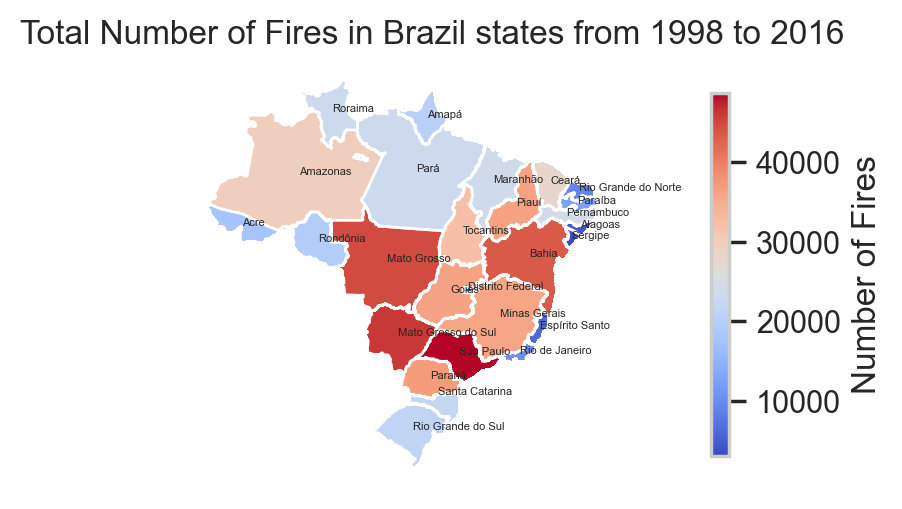

In [172]:
plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

states_geo.plot(column="Number of Fires", cmap="coolwarm", legend=True,
    legend_kwds={"label": "Number of Fires", "orientation": "vertical", "shrink": 0.6,},
    ax=ax)

ax.set_title("Total Number of Fires in Brazil states from 1998 to 2016")
ax.axis('off')

#using the x, y cordinates of the center points we had calculated, we label the states
for x, y, label in zip(states_geo_points.geometry.x, states_geo_points.geometry.y, states_geo_points["NAME_1"]):
    plt.text(x, y, label, fontsize = 4)

The choropleth map above lends more clarity to the patterns we previously observed in the cluster map. 
>* From this map, we see that the states with more fire occurrences cluster together around the mid region of the country. This suggests that geographical location tends to be an important factor in play here. Further digging will most likely reveal interesting features that states in this region have in common which predisposes them to wildfires, and probably how these features are depressed or absent in the states outside this region. These features may be meterological and even socioeconomical.

### PART 3:  AN INTEREST IN FIRE OCCURRENCES IN THE MOST RECENT YEAR, 2017 THAT IS.

In [173]:
#we do these again because both data and data_17 have changed
#in the course of our initial analysis

data = pd.read_csv('Brazilian-fire-dataset.csv')
data = data.drop_duplicates(keep = "first")
data_17 = data[data['Year'] == 2017]

In [174]:
data_17.shape

(297, 5)

In [175]:
#just making sure. notice that we used 11 months and 27 states
#remember 2017 lacked data for December, hence 11 months

27 * 11

297

In [176]:
#group fires in 2017 by months

months_17 = data_17['Number of Fires'].groupby(data_17['Month'])

months_17 = months_17.sum().reindex(['January', 'February', 'March', 'April', 
                                             'May', 'June', 'July', 'August', 'September',
                                              'October', 'November', 'December'])

In [177]:
#Recall that we removed 2017 from the initial analysis
#because data on December was missing in all the states

#Since we'll be observing the total number of fires,
#we can estimate this value for 2017 and fill it in

months_17

Month
January      2370.000
February     1400.000
March        2017.000
April        1559.000
May          2506.000
June         4148.361
July         5929.998
August       4120.410
September    2779.317
October      3600.159
November     6217.379
December          NaN
Name: Number of Fires, dtype: float64

In [178]:
#extract data on all Decembers from 1998 to 2016
dec = data[data["Month"] == "December"]

#group the number of fires by year and take the sum
dec = dec["Number of Fires"].groupby(dec["Year"]).sum()

dec.head()

Year
1998    2043.407
1999    2267.111
2000    1309.159
2001    2344.860
2002    3725.227
Name: Number of Fires, dtype: float64

In [179]:
#We fill in the mean total number of fires in December from 1998 to 2016.
#We do this in order to be conservative, since we don't have too much information


months_17['December'] = np.mean(dec)

In [180]:
months_17['December']

3028.183157894737

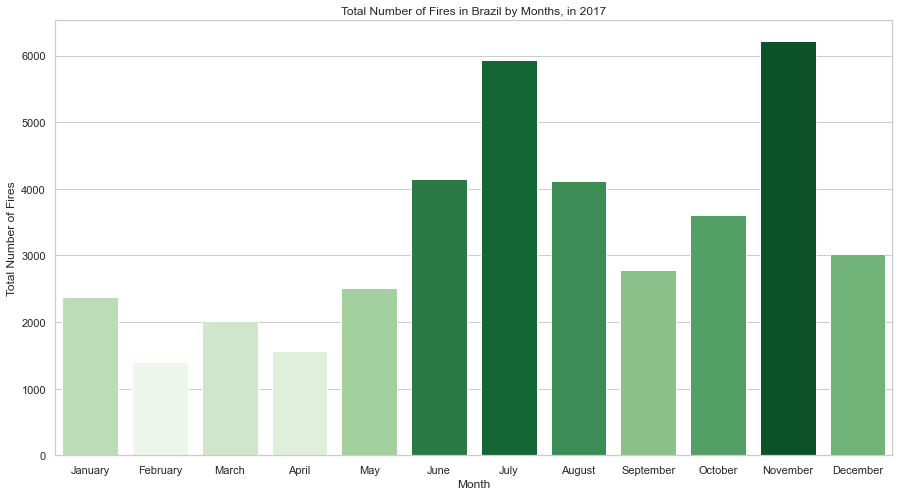

In [181]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.set(style = 'whitegrid', color_codes = True)
palette = sns.color_palette("Greens_r", len(months_17))
rank = months_17.argsort().argsort()

sns.barplot(x = months_17.index, y = months_17, palette = np.array(palette[::-1])[rank])

ax.set(ylabel = "Total Number of Fires")
plt.title("Total Number of Fires in Brazil by Months, in 2017")
plt.show()

* The trend is very similar to what was observed when in the sum from 1998 to 2016; there were more fire occurences in the second half of the year


In [182]:
states_17 = data_17['Number of Fires'].groupby(data_17["State"])
states_17 = pd.Series(states_17.sum()).sort_values()

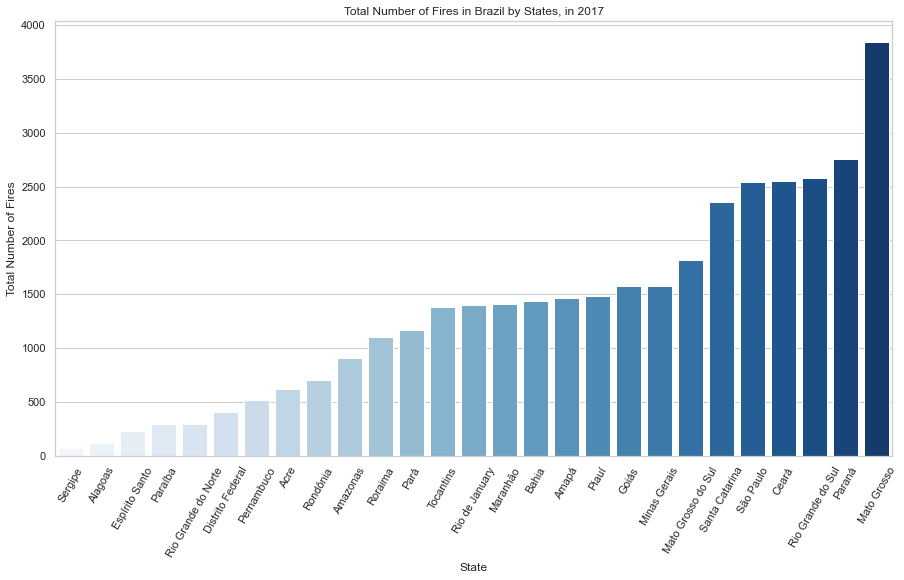

In [183]:
fig, ax = plt.subplots(figsize = (15, 8))

sns.set(style = 'whitegrid', color_codes = True)
palette = sns.color_palette("Blues_r", len(states_17))
rank = states_17.argsort().argsort()

sns.barplot(x = states_17.index, y = states_17, palette = np.array(palette[::-1])[rank])

ax.set(ylabel = "Total Number of Fires")
plt.xticks(rotation = 60)
plt.title("Total Number of Fires in Brazil by States, in 2017")
plt.show()

* Comparing with the barplot for states earlier, we see that there is a difference in the total number of fires for almost all the states. For example, Mato Grosso as the state with the highest number of fires in 2017, had the 3rd highest number of fires from 1998 to 2017. 
* However, looking closely, the differences are not too much. States with lower number of fires over the past 19 years still have relatively lower number of fires in 2017. We shall verify this when we draw a choropleth map for 2017.

In [184]:
#CHOROPLETH MAP

#make a dataframe from states_17 and make its index a column of that df
states_17 = states_17.to_frame().reset_index() 

#replace with the correct spelling as we did earlier,
#to make for accurate merging witht the geopandas df
states_17["State"] = states_17["State"].replace("Rio de January", "Rio de Janeiro")

In [185]:
set(states_geo.NAME_1) == set(states_17.State)

True

In [186]:
#drop the former number of fires (1998 to 2016)
states_geo.drop("Number of Fires", axis = 1, inplace = True) 


In [187]:
#add the total number of fires by state in 2017
states_geo = pd.merge(states_geo, states_17, left_on = "NAME_1", right_on = "State")

states_geo.drop("State", axis = 1, inplace = True)


In [188]:
states_geo.head()

,ID_0,ISO,NAME_0,ID_1,NAME_1,HASC_1,CCN_1,CCA_1,TYPE_1,ENGTYPE_1,NL_NAME_1,VARNAME_1,geometry,center,Number of Fires
0,33,BRA,Brazil,1,Acre,BR.AC,0,None,Estado,State,None,None,"POLYGON ((-73.33251 -7.32488, -73.27482 -7.350...",POINT (-70.44667 -9.30992),618.430
1,33,BRA,Brazil,2,Alagoas,BR.AL,0,None,Estado,State,None,None,"MULTIPOLYGON (((-35.90153 -9.86180, -35.90153 ...",POINT (-36.62320 -9.51555),121.000
2,33,BRA,Brazil,3,Amapá,BR.AP,0,None,Estado,State,None,None,"MULTIPOLYGON (((-50.02403 0.85986, -50.02403 0...",POINT (-51.96103 1.44004),1465.000
3,33,BRA,Brazil,4,Amazonas,BR.AM,0,None,Estado,State,None,Amazone,"POLYGON ((-67.32623 2.02968, -67.30118 1.92997...",POINT (-64.71488 -4.18678),906.905
4,33,BRA,Brazil,5,Bahia,BR.BA,0,None,Estado,State,None,Ba¡a,"MULTIPOLYGON (((-38.69708 -17.97903, -38.69708...",POINT (-41.73008 -12.47331),1441.814


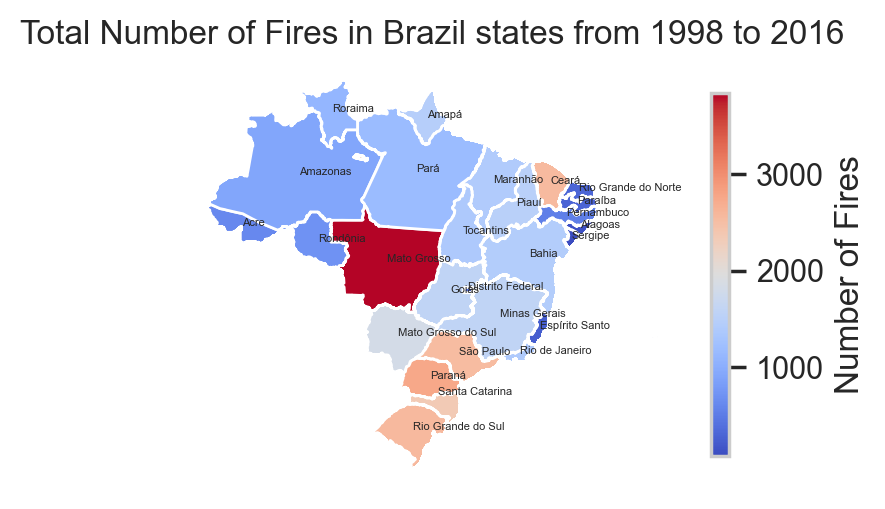

In [189]:
#NOTE that the center points and every other thing remains thesame.
#only that the 2017 total number of fires is now used

plt.rcParams.update({"font.size": 5})

fig, ax = plt.subplots(figsize=(4, 4), dpi=200)

states_geo.plot(column="Number of Fires", cmap="coolwarm", legend=True,
    legend_kwds={"label": "Number of Fires", "orientation": "vertical", "shrink": 0.6,},
    ax=ax)

ax.set_title("Total Number of Fires in Brazil states from 1998 to 2016")
ax.axis('off')

#using the x, y cordinates of the center points we had calculated, we label the states
for x, y, label in zip(states_geo_points.geometry.x, states_geo_points.geometry.y, states_geo_points["NAME_1"]):
    plt.text(x, y, label, fontsize = 4)

* The pattern on the map above is similar - with few differences - to that on the first choropleth map. It is just sublte and may be somewhat difficult to see. This is because we have the total number of fires in one year as compared to total number of fires from 19 years, and this affects the shades of the color on the map. 
>* For example, states in the mid region which had light shades of red now have light blue (Tocantins, Bahia, Minas Gerais etc), and correspondingly, other states that had light blue now have deep blue (Amazonas, Rondonia, Acre etc)
* The few diferences observed include states like Santa Catarina and Rio Grande do Sul which were low in the number of fires in the the former map but high in the one above
* Also note there is a wide margin between the number of fires in Mato Grosso and every other state, as seen in its deep red coloration. Though Mato Grosso experiences a lot of fires, as seen in the first choropleth map, its extremely high number of fires - compared with other states - in 2017 warrants further investigation 

In [190]:
#to buttress the last point, Mato Grosso had over 1000 fires more than the state that was second place to it.
states_17

,State,Number of Fires
0,Sergipe,75.000
1,Alagoas,121.000
2,Espírito Santo,234.000
3,Paraíba,294.000
4,Rio Grande do Norte,299.000
5,Distrito Federal,410.000
6,Pernambuco,522.000
7,Acre,618.430
8,Rondônia,702.395
9,Amazonas,906.905
